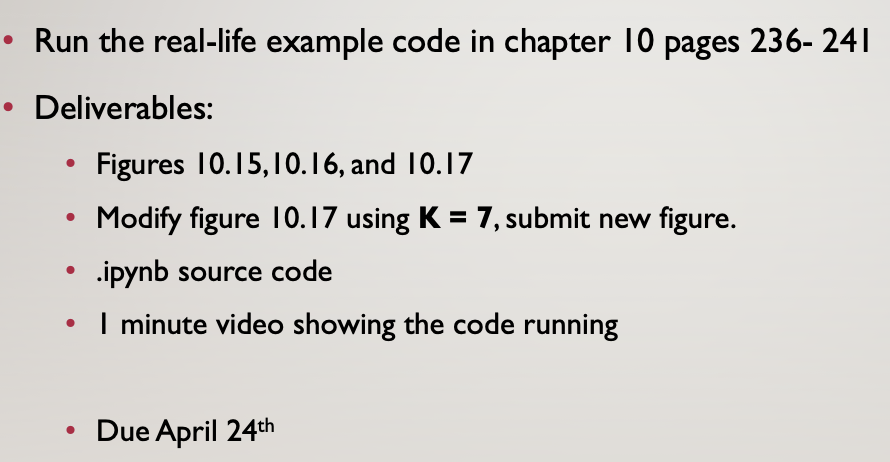

## Marcos Hernandez
### Using K-Means to Solve Real-Life Problems

### Real world use case:


#### Problem:
A clothing designer would like to design some new shorts. An important design problem would be to come up with the series of sizes that can fit most people. Essentially a  series of sizes of people with different:
* Waist Circumference
* Upper Leg Length

You need to find the right combination of sizes.

#### Solution:
The K-Means algorithm can be used to solve this problem. 

* Obtain a dataset containing measurements of a group of people (of certain age range).
* Apply the K-Means algorithm to group these people into clusters based on specific measurement of their body parts.
* Once the cluster are found, they can be used to get a clear picture of the sizes that need to be designed.

#### Dataset:
The dataset has 27 columns and 9338 rows. We will focus on two of them:
* BMXWAIST: Waist Circumference(cm)
* BMXLEG: Upper Leg Length(cm)

The dataset is sived in the BMX_G.csv file


In [77]:
# Data

import numpy as np
import pandas as pd

df = pd.read_csv("BMX_G.csv")

print(df.shape) # (9338, 27)


(9338, 27)


#### Data Cleaning

Dataset may contains significant missing values:
* check for missing values

In [78]:
df.isnull().sum() # There are many missing values

# But we are only interseted in these two:

# #-------------------------#
# |  Column  | Missing vals |
# |-------------------------|
# |bmxleg    |        2383  |
# |bmx_waist |        1134  |
# #-------------------------#

Unnamed: 0       0
seqn             0
bmdstats         0
bmxwt           95
bmiwt         8959
bmxrecum      8259
bmirecum      9307
bmxhead       9102
bmihead       9338
bmxht          723
bmiht         9070
bmxbmi         736
bmdbmic       5983
bmxleg        2383
bmileg        8984
bmxarml        512
bmiarml       8969
bmxarmc        512
bmiarmc       8965
bmxwaist      1134
bmiwaist      8882
bmxsad1       2543
bmxsad2       2543
bmxsad3       8940
bmxsad4       8940
bmdavsad      2543
bmdsadcm      8853
dtype: int64

In [79]:
#Removing missing values

df = df.dropna(subset = ["bmxleg","bmxwaist"]) # remove rows with NaNs
print(df.shape) #(6899, 27)

#Note: Null data records for specified colimns have been removed,
#  form the original 9338 records, there are now only 6899 records.

(6899, 27)


#### Plotting dataset

Text(0, 0.5, 'Waist Circumference (cm)')

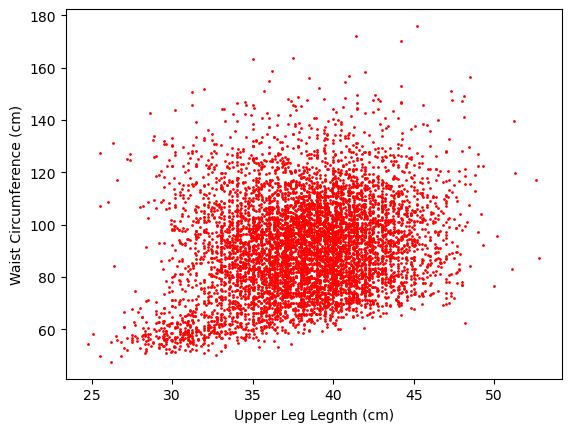

In [80]:
#importing pyplot
import matplotlib.pyplot as plt

#Scatter plot
plt.scatter(df['bmxleg'], df['bmxwaist'], c = "r", s = 1)

#Setting Plot Labels
plt.xlabel("Upper Leg Legnth (cm)")
plt.ylabel("Waist Circumference (cm)")

Figure 1:The scatterplot showing the distribution of waist circumference and upper leg length.

#### Clustering using K-Means
Assuming we are to create two sizes of shorts, in this case meaning that we'd like to cluster the the points in two clusters; that is, k=2. 
* Using scikit-learn's KMeans model to perform this clustering

Text(0.5, 1.0, 'Two Clusters')

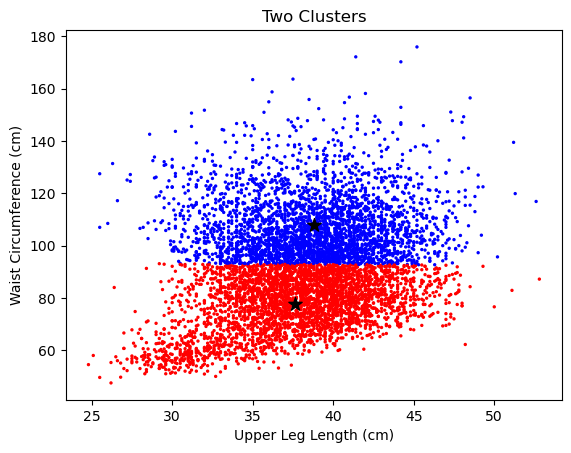

In [81]:
#---using sci-kit-learn---
from sklearn.cluster import KMeans

k = 2
x = np.array(list(zip(df['bmxleg'],df['bmxwaist'])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c= colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
plt.xlabel("Upper Leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")
plt.title("Two Clusters")


Figure 2: Clustering the points into two clusters, the main focus is in the two clusters denoted as black stars.

In [82]:
# Centroids in a list comprehension
c = [print(f"Centroid {i+1}:", centroid) for i,centroid in enumerate(centroids)]
print(c)

Centroid 1: [ 38.82082686 107.92881567]
Centroid 2: [37.65540467 77.85152091]
[None, None]


#### Results
Given that only two sizes are to be produced we set K=2.

After calculating centroids for k clusters(k=2), we can deduct that these two centroids derive the dimensions to be used for the shorts that are to be designed:

In [83]:
# Shorts dimensions for k=2 (Two clusters)
c = [print(f"Waist:{centroid[1]:0.2f}cm \t Upper leg length:{centroid[0]:0.2f}cm") for centroid in centroids]
print(c)

Waist:107.93cm 	 Upper leg length:38.82cm
Waist:77.85cm 	 Upper leg length:37.66cm
[None, None]


### Finding Optimal number of Clusters 

We can find the optimal number of different cluster (classes) to create in order to find the best number of different sizes to design based on the dataset, by trying multiple values for k, because 2 (k=2) might not be the best choice when tryng to accomodate as many people as posible as show in figure 2.

In [84]:
from sklearn import metrics

#---Supressing warings----------
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#---Looking for the optimal k---
silhouette_avgs = []
min_k = 2

#---trying k from 2 to 10 in order to maximize number of labels---
for k in range(min_k, 10):
    kmean = KMeans(n_clusters=k).fit(x)
    score = metrics.silhouette_score(x, kmean.labels_)
    print("Silhouette Coefficients for k =", k, "is", score)
    silhouette_avgs.append(score)

#---the optimal k is the one with the highest average silhouette---
optimal_k = silhouette_avgs.index(max(silhouette_avgs)) + min_k
print("Optimal K is", optimal_k)

Silhouette Coefficients for k = 2 is 0.5165351076055341
Silhouette Coefficients for k = 3 is 0.47226905068761915
Silhouette Coefficients for k = 4 is 0.43699853337760847
Silhouette Coefficients for k = 5 is 0.41912075493761086
Silhouette Coefficients for k = 6 is 0.3939120712888423
Silhouette Coefficients for k = 7 is 0.37806366101408795
Silhouette Coefficients for k = 8 is 0.36090975143785636
Silhouette Coefficients for k = 9 is 0.34109817810903614
Optimal K is 2


#### Optimal K
As seen above k=2 is the optimal k. This is because it has the highest Silhouette Coefficient.

### Clustering the dataset to different K values

Suppose that although 2 is the optimal number of clusters the company would actually like to have a set of 4 different sizes to be designed for their company in order to accomodate a wide range of customers. 
* Perform K-Means for k = 4 on the same data points
* Perfotm K-Means for k = 7 on the same data points

### k = 4:

Text(0.5, 1.0, 'Four Clusters')

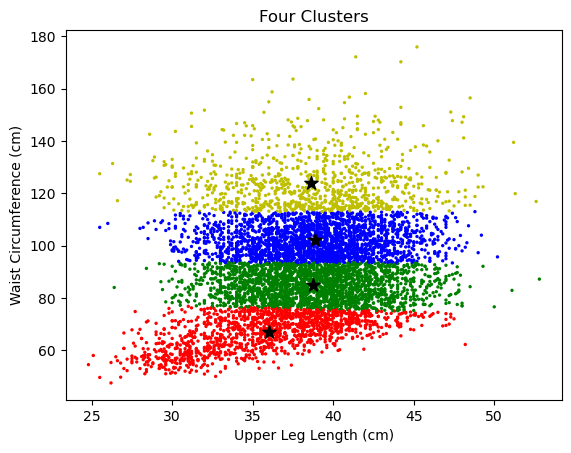

In [85]:
from sklearn.cluster import KMeans

k = 4
x = np.array(list(zip(df["bmxleg"],df["bmxwaist"])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
plt.xlabel("Upper Leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")
plt.title("Four Clusters")

Figure 3: Clustering the datapoints into four clusters

In [86]:
c = [print(f"Waist:{centroid[1]:0.2f}cm \t Upper leg length:{centroid[0]:0.2f}cm") for centroid in centroids]
print(c)

Waist:102.01cm 	 Upper leg length:38.89cm
Waist:67.16cm 	 Upper leg length:36.00cm
Waist:123.95cm 	 Upper leg length:38.60cm
Waist:84.86cm 	 Upper leg length:38.72cm
[None, None, None, None]


### K = 7:

Text(0.5, 1.0, 'Four Clusters')

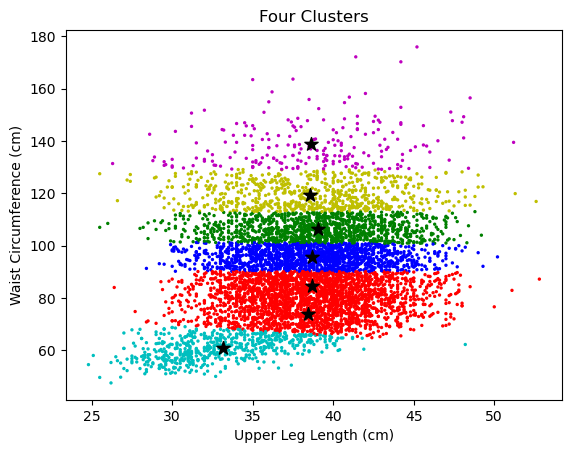

In [87]:
from sklearn.cluster import KMeans

k = 7
x = np.array(list(zip(df["bmxleg"],df["bmxwaist"])))

kmeans = KMeans(n_clusters=k)
kmeans = kmeans.fit(x)
labels = kmeans.predict(x)
centroids = kmeans.cluster_centers_

#---map the labels to colors---
c = ['b','r','y','g','c','m','r']
colors = [c[i] for i in labels]

plt.scatter(df['bmxleg'],df['bmxwaist'], c=colors, s=2)
plt.scatter(centroids[:,0], centroids[:,1], marker='*', s=100, c='black')
plt.xlabel("Upper Leg Length (cm)")
plt.ylabel("Waist Circumference (cm)")
plt.title("Four Clusters")

Figure 4: Clustering the datapoints into seven clusters

In [88]:
c = [print(f"Waist:{centroid[1]:0.2f}cm \t Upper leg length:{centroid[0]:0.2f}cm") for centroid in centroids]
print(c)

Waist:95.61cm 	 Upper leg length:38.67cm
Waist:73.74cm 	 Upper leg length:38.42cm
Waist:119.49cm 	 Upper leg length:38.57cm
Waist:106.33cm 	 Upper leg length:39.05cm
Waist:60.90cm 	 Upper leg length:33.14cm
Waist:138.83cm 	 Upper leg length:38.63cm
Waist:84.74cm 	 Upper leg length:38.71cm
[None, None, None, None, None, None, None]
